# Tester_branch에서 최종 모델 성능 확인 진행

In [1]:
# 라이브러리 및 데이터 불러오기

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.datasets import load_wine

from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib.pyplot as plt

wine = load_wine()

''' 데이터 코드를 작성해주세요 '''
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# feature로 사용할 데이터에서는 'target' 컬럼을 drop합니다.
# target은 'target' 컬럼만을 대상으로 합니다.
# X, y 데이터를 test size는 0.2, random_state 값은 42로 하여 train 데이터와 test 데이터로 분할합니다.

# DT 모델링 성능

Best Hyper-parameter {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score 0.9224137931034484


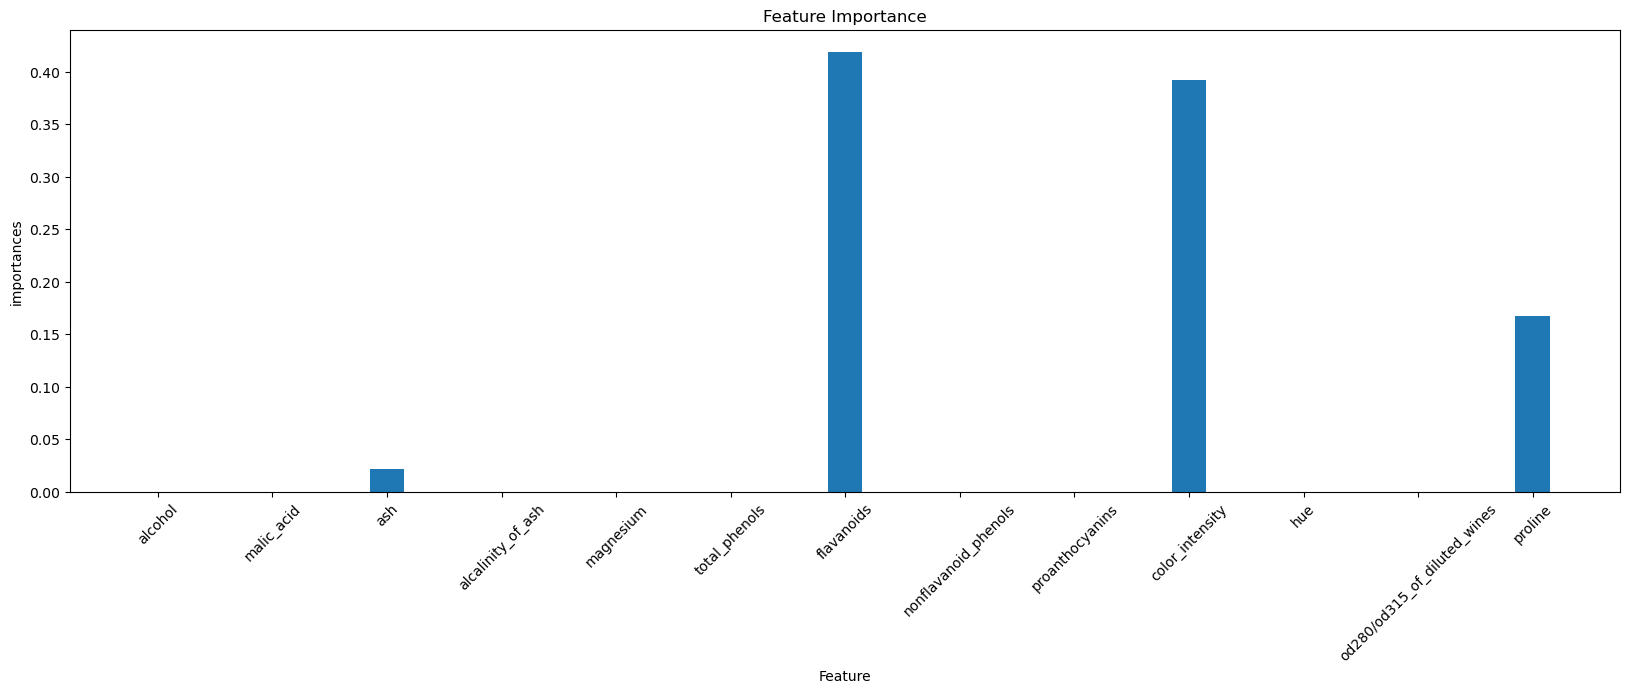

In [2]:
''' 코드를 작성해주세요 '''
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

#  HyperParameter Tunning
param_grid = {
    "criterion" : ['gini', 'entropy'],
    "max_depth" : [2,3,4,5],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# DT 모델 생성 및 그리드서치
dt_grid = DecisionTreeClassifier(random_state= 42)
df_grid_search = GridSearchCV(dt_grid, param_grid, cv = 5)
df_grid_search.fit(X_train, y_train)

print("Best Hyper-parameter", df_grid_search.best_params_)
print("Best Score", df_grid_search.best_score_)


# 정확도 계산 
dt_best_model = df_grid_search.best_estimator_

dt_y_pred_grid = dt_best_model.predict(X_test)
dt_accuracy_grid = accuracy_score(y_test, dt_y_pred_grid)
# print('Accuracy Grid :', accuracy_grid)


# Feature Importance를 계산
dt_importances = dt_best_model.feature_importances_

# Best model의 Feature Importance를 시각화
plt.figure(figsize = (20,6))

# 막대 그래프 생성
plt.bar(range(len(dt_importances)), dt_importances, width=0.3)
plt.xlabel('Feature')
plt.ylabel('importances')
plt.title('Feature Importance')
plt.xticks(range(len(dt_importances)), X.columns, rotation = 45)
plt.show()

# XGB 모델링 성능

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best accuracy: 0.9504926108374384


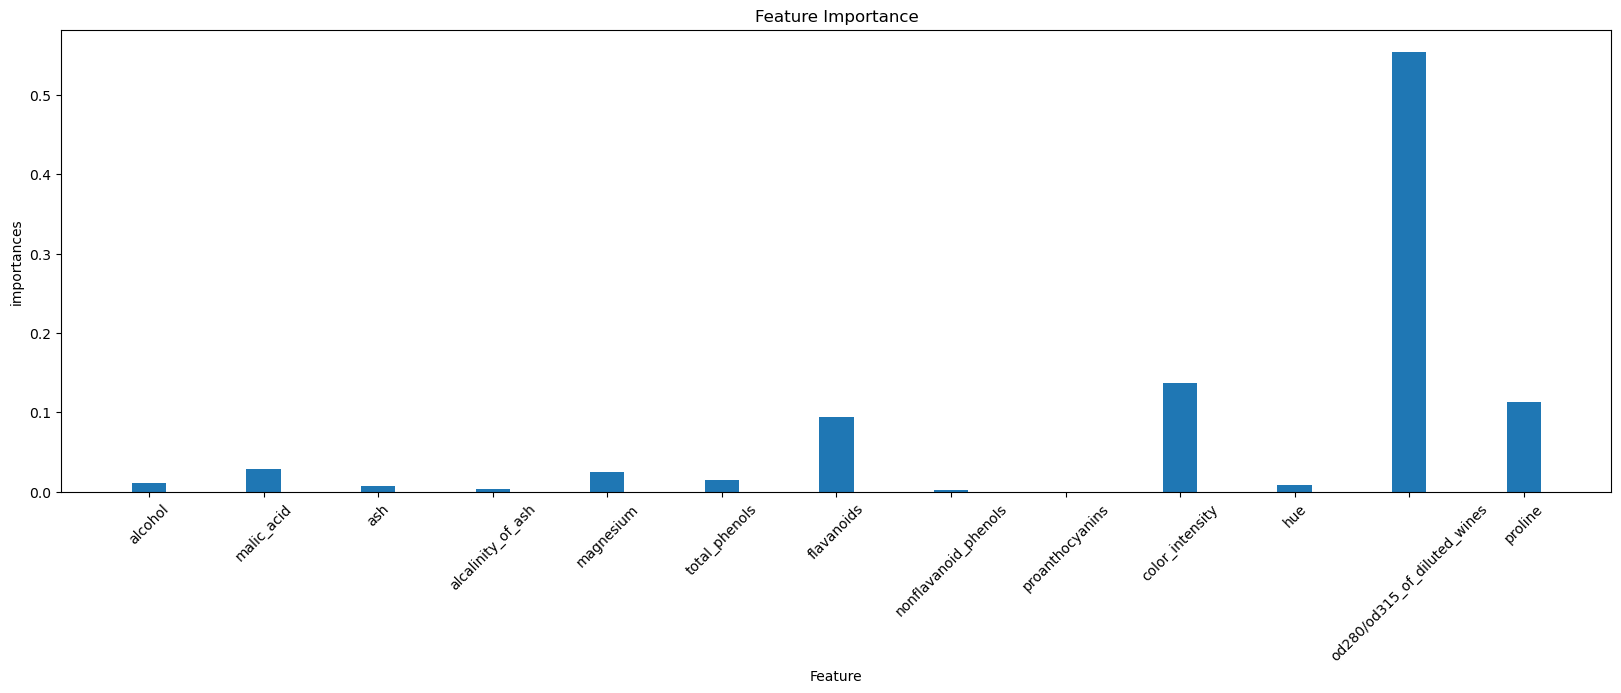

In [3]:
''' 코드를 작성해주세요 '''
# Xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# 하이퍼파라미터 범위지정
params = {
    "max_depth" : [3, 5, 7, 9, 15],
    "learning_rate" : [0.1, 0.01, 0.001],
    "n_estimators": [50, 100, 200, 300]
}

# XGboost 모델 생성
xgb_model = XGBClassifier(random_state=42)

# 하이퍼파라미터 최적화 
xg_grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
xg_grid_search.fit(X_train, y_train)

print("Best parameters:", xg_grid_search.best_params_)
print("Best accuracy:" , xg_grid_search.best_score_)


# 정확도 계산 
xg_best_model = xg_grid_search.best_estimator_

xg_y_pred_grid = xg_best_model.predict(X_test)
xg_accuracy_grid = accuracy_score(y_test, xg_y_pred_grid)
# print('Accuracy Grid :', xg_accuracy_grid)


# Feature Importance를 계산
xg_importances = xg_best_model.feature_importances_

# Best model의 Feature Importance를 시각화
plt.figure(figsize = (20,6))

# 막대 그래프 생성
plt.bar(range(len(xg_importances)), xg_importances, width=0.3)
plt.xlabel('Feature')
plt.ylabel('importances')
plt.title('Feature Importance')
plt.xticks(range(len(xg_importances)), X.columns, rotation = 45)
plt.show()

# 성능 비교 시각화

===================== DT 성능 확인 =====================
DT Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

===================== XGB 성능 확인 =====================
XGB Accuracy: 0.9722222222222222
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36



<Axes: >

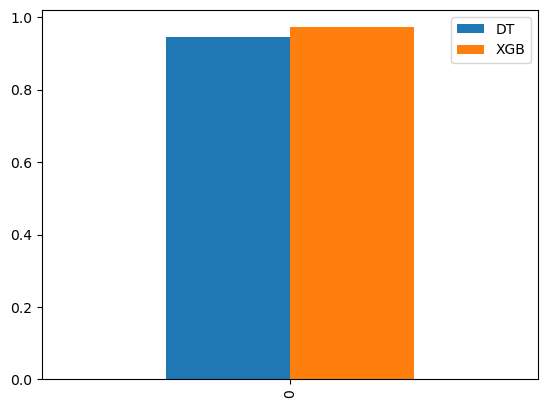

In [4]:
''' 코드를 작성해주세요 '''
# 정확도 계산 및 분류 리포트를 출력
print('===================== DT 성능 확인 =====================')
print("DT Accuracy:", dt_accuracy_grid)
print(classification_report(y_test, dt_y_pred_grid))

print('===================== XGB 성능 확인 =====================')
print("XGB Accuracy:", xg_accuracy_grid)
print(classification_report(y_test, xg_y_pred_grid))

df = pd.DataFrame([dt_accuracy_grid,xg_accuracy_grid], index=['DT','XGB'])
df = df.T
display(df.plot(kind='bar'))